In [1]:
from my_progs.catalog.read_gaia import read_dr2_iers
from my_progs.vlbi.read_sou import read_sou
from my_progs.catalog.pos_diff import radio_cat_diff_calc

souA = read_sou("../data/icrf250/icrf250.sou")
souB = read_sou("../data/icrf250-fix/icrf250-fix.sou")
souC = read_sou("../data/gcrf-a1u/gcrf-a1u.sou")
souD = read_sou("../data/gcrf-a1u-fix/gcrf-a1u-fix.sou")

# Gaia DR2
gdr2 = read_dr2_iers()

# Calculate the positional difference
souoftA = radio_cat_diff_calc(souA, gdr2, sou_name="iers_name")
souoftB = radio_cat_diff_calc(souB, gdr2, sou_name="iers_name")
souoftC = radio_cat_diff_calc(souC, gdr2, sou_name="iers_name")
souoftD = radio_cat_diff_calc(souD, gdr2, sou_name="iers_name")

In [8]:
import astropy.units as u
import numpy as np
# My modules
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting

# Transform columns into np.array
dra = np.array(souoftA["dra"])
ddec = np.array(souoftA["ddec"])
dra_err = np.array(souoftA["dra_err"])
ddec_err = np.array(souoftA["ddec_err"])
ra_rad = np.array(souoftA["ra"].to(u.radian))
dec_rad = np.array(souoftA["dec"].to(u.radian))
dra_ddec_cov = np.array(souoftA["dra_ddec_cov"])

# Transformation parameters
parA, sigA, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    #     cov=dra_ddec_cov, elim_flag="None")
    elim_flag="None")

# mas -> uas
parA = parA * 1.e3
sigA = sigA * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size,
       parA[3], sigA[3], parA[4], sigA[4], parA[5], sigA[5],
       parA[0], sigA[0], parA[1], sigA[1], parA[2], sigA[2],))

print(dra.size,
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f"
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f" %
      (parA[3], sigA[3], parA[4], sigA[4], parA[5], sigA[5],
       parA[0], sigA[0], parA[1], sigA[1], parA[2], sigA[2]))


Estimates (  2799 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
         +48 +/-  27  -129 +/-  25   -60 +/-  25         -22 +/-  25   +39 +/-  25    +9 +/-  26
--------------------------------------------------------------------------------------------

2799   +48  27  -129  25   -60  25  -22  25   +39  25    +9  26


In [9]:
# Transform columns into np.array
dra = np.array(souoftB["dra"])
ddec = np.array(souoftB["ddec"])
dra_err = np.array(souoftB["dra_err"])
ddec_err = np.array(souoftB["ddec_err"])
ra_rad = np.array(souoftB["ra"].to(u.radian))
dec_rad = np.array(souoftB["dec"].to(u.radian))
dra_ddec_cov = np.array(souoftB["dra_ddec_cov"])

# Transformation parameters
parB, sigB, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    #     cov=dra_ddec_cov, elim_flag="None")
    elim_flag="None")

# mas -> uas
parB = parB * 1.e3
sigB = sigB * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size,
       parB[3], sigB[3], parB[4], sigB[4], parB[5], sigB[5],
       parB[0], sigB[0], parB[1], sigB[1], parB[2], sigB[2],))

print(dra.size,
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f"
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f" %
      (parB[3], sigB[3], parB[4], sigB[4], parB[5], sigB[5],
       parB[0], sigB[0], parB[1], sigB[1], parB[2], sigB[2]))


Estimates (  2555 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
         +23 +/-  32   -59 +/-  30   -38 +/-  28         +15 +/-  30   +94 +/-  29   +62 +/-  30
--------------------------------------------------------------------------------------------

2555   +23  32   -59  30   -38  28  +15  30   +94  29   +62  30


In [10]:
# Transform columns into np.array
dra = np.array(souoftC["dra"])
ddec = np.array(souoftC["ddec"])
dra_err = np.array(souoftC["dra_err"])
ddec_err = np.array(souoftC["ddec_err"])
ra_rad = np.array(souoftC["ra"].to(u.radian))
dec_rad = np.array(souoftC["dec"].to(u.radian))
dra_ddec_cov = np.array(souoftC["dra_ddec_cov"])

# Transformation parameters
parC, sigC, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    #     cov=dra_ddec_cov, elim_flag="None")
    elim_flag="None")

# mas -> uas
parC = parC * 1.e3
sigC = sigC * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size,
       parC[3], sigC[3], parC[4], sigC[4], parC[5], sigC[5],
       parC[0], sigC[0], parC[1], sigC[1], parC[2], sigC[2],))

print(dra.size,
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f"
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f" %
      (parC[3], sigC[3], parC[4], sigC[4], parC[5], sigC[5],
       parC[0], sigC[0], parC[1], sigC[1], parC[2], sigC[2]))

Estimates (  2799 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
          -6 +/-  27  -100 +/-  25   -33 +/-  25         -22 +/-  25   +36 +/-  25    +8 +/-  26
--------------------------------------------------------------------------------------------

2799    -6  27  -100  25   -33  25  -22  25   +36  25    +8  26


In [11]:
# Transform columns into np.array
dra = np.array(souoftD["dra"])
ddec = np.array(souoftD["ddec"])
dra_err = np.array(souoftD["dra_err"])
ddec_err = np.array(souoftD["ddec_err"])
ra_rad = np.array(souoftD["ra"].to(u.radian))
dec_rad = np.array(souoftD["dec"].to(u.radian))
dra_ddec_cov = np.array(souoftD["dra_ddec_cov"])

# Transformation parameters
parD, sigD, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    #     cov=dra_ddec_cov, elim_flag="None")
    elim_flag="None")

# mas -> uas
parD = parD * 1.e3
sigD = sigD * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size,
       parD[3], sigD[3], parD[4], sigD[4], parD[5], sigD[5],
       parD[0], sigD[0], parD[1], sigD[1], parD[2], sigD[2],))

print(dra.size,
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f"
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f" %
      (parD[3], sigD[3], parD[4], sigD[4], parD[5], sigD[5],
       parD[0], sigD[0], parD[1], sigD[1], parD[2], sigD[2]))


Estimates (  2555 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
        +140 +/-  32  -112 +/-  30   -68 +/-  28         +66 +/-  31   -12 +/-  29   -31 +/-  30
--------------------------------------------------------------------------------------------

2555  +140  32  -112  30   -68  28  +66  31   -12  29   -31  30


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


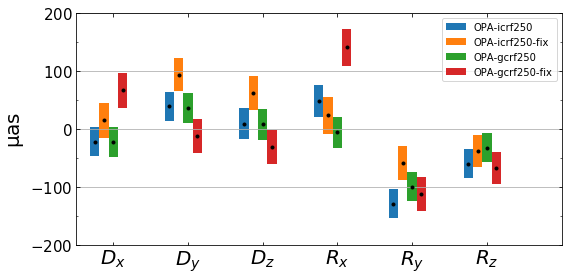

In [31]:
from matplotlib.ticker import MultipleLocator
from matplotlib import pyplot as plt
%matplotlib inline

# Plot
fig, ax = plt.subplots(figsize=(8, 4))

terms = ["$D_x$", "$D_y$", "$D_z$", "$R_x$", "$R_y$", "$R_z$"]

barwidth = 0.25
loc = 0.25

pos = np.arange(len(terms)) * 2
posA = pos - 2 * loc
posB = pos - loc
posC = pos
posD = pos +loc

ax.bar(posA, 2 * sigA, bottom=parA-sigA, width=barwidth,
       ecolor="black", label="OPA-icrf250")
ax.bar(posB, 2 * sigB, bottom=parB-sigB, width=barwidth,
       ecolor="black", label="OPA-icrf250-fix")
ax.bar(posC, 2 * sigC, bottom=parC-sigC, width=barwidth,
       ecolor="black", label="OPA-gcrf250")
ax.bar(posD, 2 * sigD, bottom=parD-sigD, width=barwidth,
       ecolor="black", label="OPA-gcrf250-fix")

ax.plot(posA, parA, "k.")
ax.plot(posB, parB, "k.")
ax.plot(posC, parC, "k.")
ax.plot(posD, parD, "k.")

ax.set_xticks(pos)
ax.set_xticklabels(terms, fontsize=20)
ax.set_xlim([-1, len(posD) * 2])
ax.set_ylim([-200, 200])
ax.set_ylabel("$\\mathrm{\mu as}$", fontsize=20)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.yaxis.grid()  # horizontal lines

# Tickers
ytick = np.arange(-200, 201, 100)
ax.set_yticks(ytick)
ax.set_yticklabels(["${:.0f}$".format(yi) for yi in ytick],
                   fontsize=15)
ax.yaxis.set_minor_locator(MultipleLocator(50))

ax.legend()

plt.tight_layout()
plt.savefig("../plots/vsh-deg01-to-gdr2.png")
plt.savefig("../plots/vsh-deg01-to-gdr2.eps")